<a href="https://colab.research.google.com/github/Juribe7980/Project-1/blob/main/Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 2

Jessica Uribe

Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

Deleted unnecessary columns.
Deleted duplicate rows.
Identified and addressed missing values.
Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
Produced univariate visuals for the target and all features.
Identified outliers.
Clearly commented all of your cleaning steps and described any decisions you made.
Commit your file to your Github repository and submit the link below.

In [324]:
## Pandas
import pandas as pd
#Seaborn
import seaborn as sns
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer




In [325]:
df = pd.read_csv('/content/drive/MyDrive/Week 5(JJ) Regression and classification/wines_SPA.csv')
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [326]:
## Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 7500 rows, and 11 columns.
The rows represent 7500 observations, and the columns represent 10 features and 1 target variable.


In [327]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [328]:
# top 10 type of wines and their entries
df.type.value_counts().head(5)

Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
Toro Red                 296
Name: type, dtype: int64

In [329]:
# filling null values with a mean value
df['body'] = df['body'].fillna(df['body'].mean())
df['type'] = df['type'].fillna('Rioja red')
df['acidity'] = df['acidity'].fillna(df['acidity'].mean())


In [330]:
df.isnull().sum()

winery         0
wine           0
year           2
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [331]:
# datatypes of variables in the dataset
df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

In [332]:
## Display column names
df.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

No errors noted.

type
Pedro Ximenez           148.874286
Ribera Del Duero Red    109.450450
Priorat Red             104.794475
Chardonnay               78.114615
Sparkling                76.794000
Toro Red                 76.522264
Tempranillo              73.413897
Montsant Red             72.024118
Cava                     60.547576
Grenache                 57.506286
Name: price, dtype: float64


Text(0.5, 1.0, 'Distribution of type in relation to price')

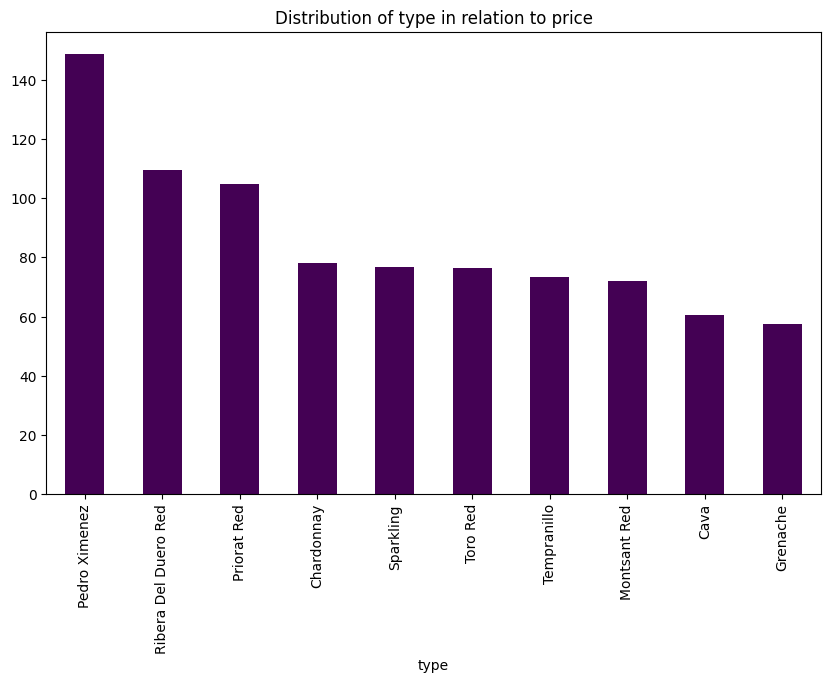

In [333]:
dgf =df.groupby('type')['price'].mean().sort_values(ascending=False)[:10]
print(dgf)
plt.figure(figsize=(10, 6))
dgf.plot(kind='bar', cmap='viridis')
plt.title('Distribution of type in relation to price')

Pedro ximenez has the highest bar of 148.47 entries while Grenache has the lowest bar of 57.5 entries.This shows that Petro ximenez is the most expensive type while Grenache is the least expensive type in the top 10 wine types.

region
Montilla-Moriles        178.689615
Conca de Barbera        164.543333
Jerez Palo Cortado      144.475455
Mentrida                121.986667
Ribera del Duero        109.230364
Aragon                  108.505000
Priorato                104.089909
Dominio de Valdepusa     99.870000
Jumilla                  80.576025
Arinzano                 76.986667
Name: price, dtype: float64


Text(0.5, 1.0, 'Distribution of Region in relation to price')

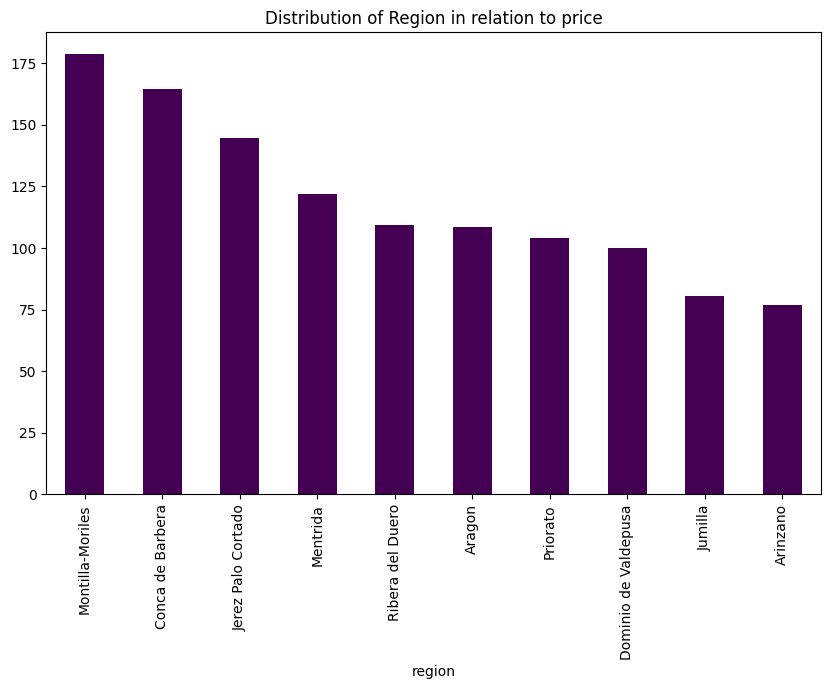

In [322]:
df1=df.groupby('region')['price'].mean().sort_values(ascending=False)[:10]
print(df1)
plt.figure(figsize=(10, 6))
df1.plot(kind='bar', cmap='viridis')
plt.title('Distribution of Region in relation to price')

Montilla-Morilles has the highest bar of 178.69 entries while Arinzano has the smallest bar of 76.99 entries. Conclusions: Wines are most expensive in Montilla-Morillas while they ae cheapest in Arinzano among the top 10 regions surveyed.



### **Inspect Values for Errors**

Check for unusual or impossible values. (Example a weight, or height that is negative in value.)

In [323]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include="number")

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.535958,0.228037
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,4.158427,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


- No unusual values noted.

Missing Values

In [345]:
## Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 2 missing values.


Model Validation Data Split

Create a copy of the database

In [346]:
## Create a copy of the dataset for Modeling
df = df.copy()

Check class balance

In [347]:
# select only object columns
categoricals = X_train.select_dtypes(include='object')

# check value counts for each object column
for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

winery
Contino             344
Artadi              198
La Rioja Alta       185
Sierra Cantabria    183
Matarromera         179
                   ... 
Pazo Barrantes        1
Codorniu              1
Francisco Barona      1
Casa Rojo             1
A Coroa               1
Name: winery, Length: 431, dtype: int64 

wine
Gran Reserva                               349
Reserva                                    349
Rioja Reserva                              183
Coleccion Privada                          175
Gran Reserva Rioja                         174
                                          ... 
Doroteo Edicion Especial 25 Aniversario      1
Martires Rioja                               1
Toro 2V Premium                              1
Iugiter                                      1
Alba de Miros Rueda Verdejo                  1
Name: wine, Length: 717, dtype: int64 

year
2011    886
2016    687
2015    647
2018    619
2017    551
       ... 
1949      1
1928      1
1976      1
1972      1


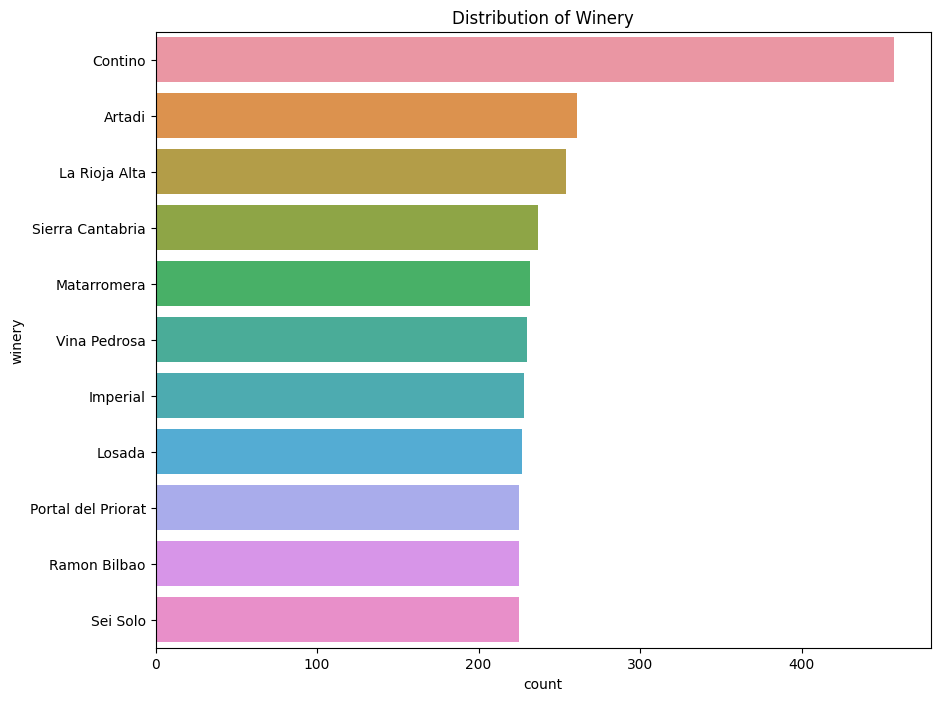

In [348]:
plt.figure(figsize=(10,8))
sns.countplot(y='winery',data=df, order=df['winery'].value_counts().index[:11])
plt.title('Distribution of Winery')
plt.show()

contina has the highest bar of more than 400 entries, Arcadi comes 2nd with approximately 300 entries.The rest have bars that are almost the same. conclusions: Contino is the most dominant winery, arcadi is the 2nd most dominant while the rest have almost the same distibution.



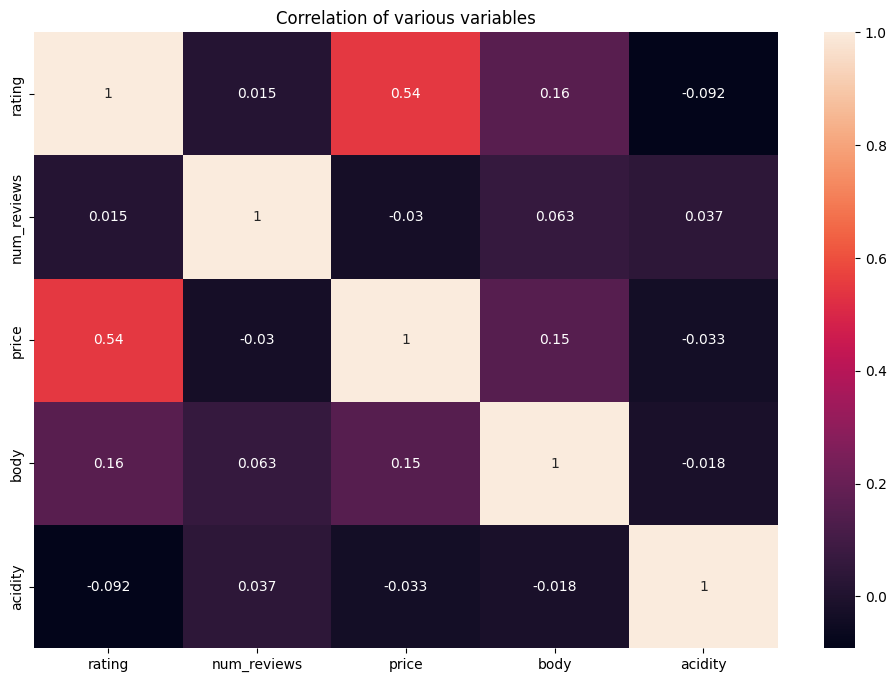

In [349]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation of various variables')
plt.show()


Correlation shows degree of linear relationship between variables.It varies from -1 to 1.price and ratings have the highest ratings of 54% mening that they are fairly positive correlated thus when ratings increase, price increase with approximately 50% of the initial increase in ratings. num-reviews and acidity have the lowest positive correlation of 3.7% meaning that number of rviews are lowly affected by the acidity of the wine thus low correlation.

Split the data

In [350]:
## Define features (X) and target (y)
target = 'rating'
X = df.drop(columns = [target]).copy()
y = df[target].copy()

In [351]:
## Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [352]:
#instantiate the StandardScaler, OneHotEncoder, OrdinalEncoder and Imputers

freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

scaler = StandardScaler()

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [353]:
# Selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [355]:
number_tuple=(scaler, num_selector)
category_tuple = (ohe, cat_selector)

In [354]:
##Create the preprocessir using make_Column transformer
preprocessor = make_column_transformer(category_tuple, 
                                       remainder='drop')